### Отчет по лабораторной работе

В рамках лабораторной работы было необходимо разработать параллельные алгоритмы, реализующие различные методы для вычисления интеграла $\int_{0}^{1}{\frac{4}{(1+x^{2})}}$.

В качестве методов численного интегрирования были рассмотрены следующие 4 метода: 
- метод прямоугольников
- метод трапеций
- метод Симпсона
- метод Гаусса 3-го порядка точности 

Построим график зависимости среднего времени работы алгоритма от числа процессов при фиксированном значении шага интегрирования для персонального компьютера.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
avg_time_pc_pd = pd.read_csv('1_pc.csv')

In [3]:
rectangle = avg_time_pc_pd[avg_time_pc_pd.algo_name == 'rectangle.py']
trapzoid = avg_time_pc_pd[avg_time_pc_pd.algo_name == 'trapezoid.py']
simpson = avg_time_pc_pd[avg_time_pc_pd.algo_name == 'simpson.py']
gauss = avg_time_pc_pd[avg_time_pc_pd.algo_name == 'gauss.py']

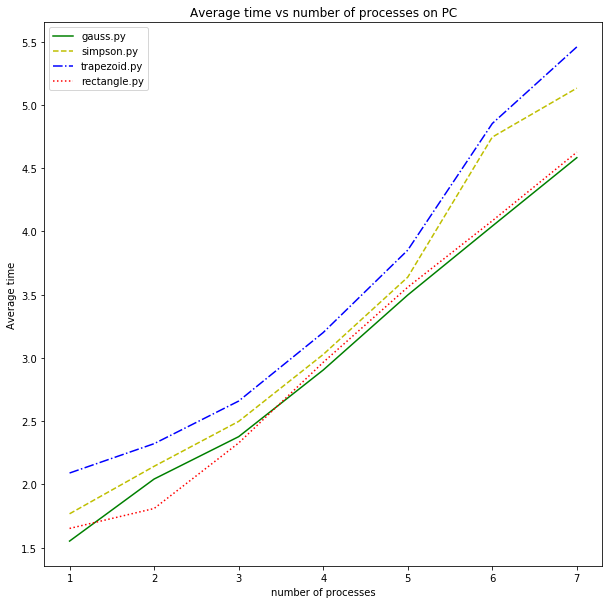

In [4]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(rectangle[" core_n"], rectangle[" avg_time "], 'g-')
plt.plot(trapzoid[" core_n"], trapzoid[" avg_time "], 'y--')
plt.plot(simpson[" core_n"], simpson[" avg_time "], 'b-.')
plt.plot(gauss[" core_n"], gauss[" avg_time "], 'r:')
plt.ylabel('Average time')
plt.xlabel('number of processes')
plt.title('Average time vs number of processes on PC')
plt.legend(avg_time_pc_pd.algo_name.unique(),)
plt.show()

Теоретически, время работы должно пропорционально уменьшаться с увеличением числа процессов. Однако практически на ПК было получено линейное увеличение времени работы.

In [5]:
avg_time_cl_pd = pd.read_csv('1_cl.csv')


In [6]:
rectangle_cl = avg_time_cl_pd[avg_time_cl_pd.algo_name == 'rectangle.py']
trapzoid_cl = avg_time_cl_pd[avg_time_cl_pd.algo_name == 'trapezoid.py']
simpson_cl = avg_time_cl_pd[avg_time_cl_pd.algo_name == 'simpson.py']
gauss_cl = avg_time_cl_pd[avg_time_cl_pd.algo_name == 'gauss.py']

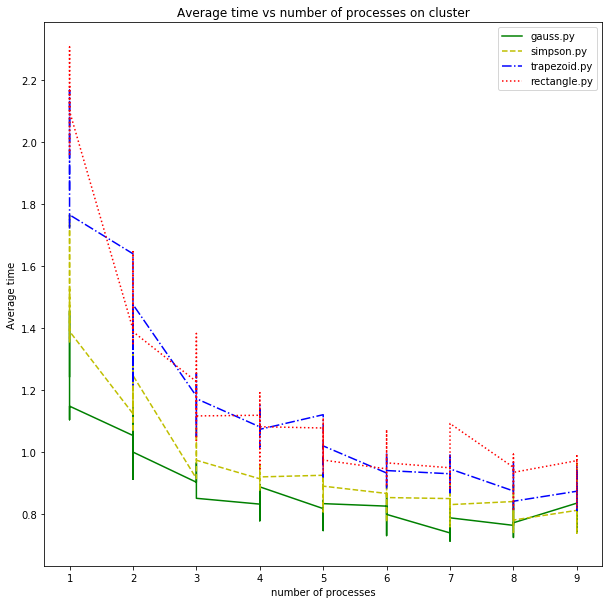

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(rectangle_cl.core_n, rectangle_cl.avg_time, 'g-')
plt.plot(trapzoid_cl.core_n, trapzoid_cl.avg_time, 'y--')
plt.plot(simpson_cl.core_n, simpson_cl.avg_time, 'b-.')
plt.plot(gauss_cl.core_n, gauss_cl.avg_time, 'r:')
plt.ylabel('Average time')
plt.xlabel('number of processes')
plt.title('Average time vs number of processes on cluster')
plt.legend(avg_time_pc_pd.algo_name.unique(),)
plt.show()

можно заметить, что на кластере время работы уменьшается при увеличении числа процессов

Ускорение, получаемое при использовании параллельного алгоритма, по сравнению с последовательным ваирантом выполнения вычислений

$S_p(n)={T_1(n)\over T_p(n)}$

где p - число процессов

In [8]:
avg_time_cl_pd = avg_time_cl_pd.groupby(('algo_name' , 'core_n')).aggregate({'avg_time':['mean','std']})
avg_time_cl_pd

avg_time          
                         mean       std
algo_name    core_n                    
gauss.py     1       2.095461  0.087929
             2       1.466146  0.085021
             3       1.211740  0.089303
             4       1.062116  0.063448
             5       1.017842  0.045098
             6       0.983170  0.043230
             7       0.950323  0.043807
             8       0.912752  0.040645
             9       0.913464  0.038739
rectangle.py 1       1.259666  0.103004
             2       0.999737  0.055708
             3       0.897063  0.027220
             4       0.842137  0.023617
             5       0.803967  0.023082
             6       0.797791  0.030970
             7       0.779441  0.025770
             8       0.772865  0.027328
             9       0.799008  0.027256
simpson.py   1       1.934681  0.131454
             2       1.409473  0.115031
             3       1.163374  0.036640
             4       1.076464  0.028131
             5       0.993849  0.036123
             6       0.937966  0.028429
             7       0.920233  0.030096
             8       0.886872  0.035906
             9       0.899843  0.029081
trapezoid.py 1       1.511550  0.120666
             2       1.183277  0.056521
             3       0.999433  0.035133
             4       0.913083  0.021531
             5       0.875763  0.026974
             6       0.837554  0.029729
             7       0.822359  0.029177
             8       0.812783  0.036731
             9       0.833808  0.038000

In [40]:
for row in avg_time_cl_pd.itertuples(index=True, name='algo_name'):
    t1=avg_time_cl_pd.at[(row.Index[0],1),('avg_time','mean')]
    tp=row._1
    print (t1/tp)

1.0
1.42923128864
1.72929945823
1.97291157632
2.0587296897
2.1313311869
2.20499861479
2.2957621156
2.29397227272
1.0
1.25999665069
1.40421018868
1.49579661588
1.56681178857
1.57894239515
1.61611381781
1.62986471467
1.57653631518
1.0
1.37262753636
1.66299056122
1.7972557472
1.94665456053
2.06263436057
2.10238204016
2.18146565335
2.15001945939
1.0
1.27742668787
1.5124072416
1.65543472041
1.72597972011
1.80471866228
1.83806485023
1.85972007496
1.81282749987


Эффективность вычисляется по формуле

$E_p(n)={T_1(n)\over pT_p(n)}={S_p(n)\over n}$

Построим график зависимости среднего времени работы алгоритма, применяемого для вычисления интеграла  $\int_{0}^{N}{\frac{4}{(1+x^{2})}}$.от N  при фиксированном числе процессов (>=2) и фиксированном шаге интегрирования для кластера.

In [9]:
avg_time_n_cl_pd = pd.read_csv('5_cl.csv')

In [10]:

avg_time_n_cl_pd = avg_time_n_cl_pd.groupby(('algo_name' , 'N(b)')).aggregate({'avg_time':['mean','std']})
avg_time_n_cl_pd.head()

avg_time          
                        mean       std
algo_name N(b)                        
gauss.py  1.000000  1.236582  4.716046
          1.230769  0.510414  0.029085
          1.461538  0.521928  0.027906
          1.692308  0.527585  0.031140
          1.923077  0.540996  0.030054

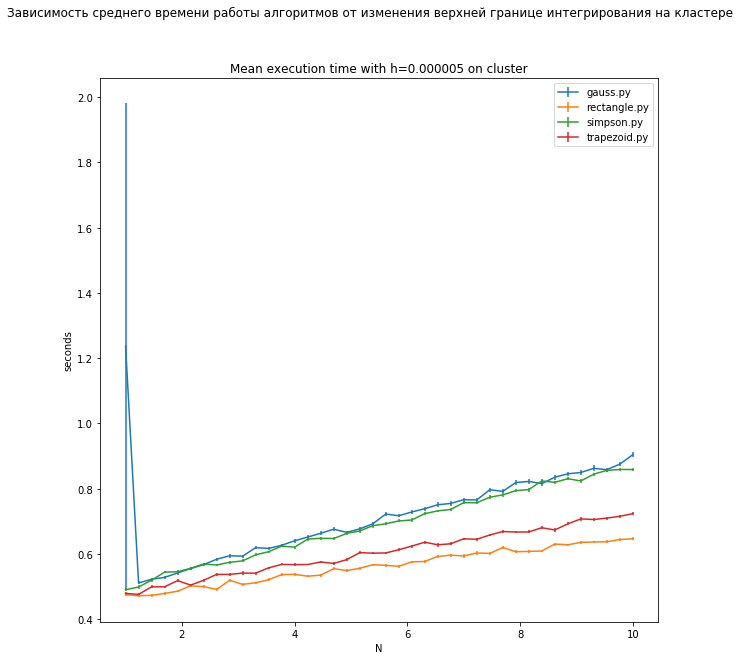

In [11]:
for alg in avg_time_n_cl_pd.index.levels[0]:
    d = avg_time_n_cl_pd.loc[alg]
    plt.errorbar(x=d.index, y=d['avg_time','mean'], yerr=d['avg_time','std'] / np.sqrt(40), label=alg)

plt.suptitle('Зависимость среднего времени работы алгоритмов от изменения верхней границе интегрирования на кластере')
plt.title('Mean execution time with h=0.000005 on cluster')
plt.xlabel('N')
plt.ylabel('seconds')
plt.legend()

pass
plt.show()

время выполнения линейно возрастает при увеличении верхней границы интегрирования